# Замечание: прежде чем мы сможем выполнить проверочный проект по линейной регрессии, нам нужно выполнить построение (конструирование) признаков - feature engineering.

Link for Google docs Bekzod: https://docs.google.com/spreadsheets/d/1yzKD-GlsVajYMOQMXiUAqwsb75rSfITt997wjSHLg88/edit?gid=0#gid=0

---
----
# Feature engineering.

Мы будем работать со следующим набором данных:

* Ames Iowa Data Set: http://jse.amstat.org/v19n3/decock.pdf

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

Open DF
---

In [ ]:
# df = pd.read_csv("..\DATA\Ames_Housing_Data.csv")

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Feature Engineering & Validation & Linear Regression/DATA-1/Ames_Housing_Data.csv")


Mounted at /content/drive


In [ ]:
df_traditional = df.copy()

In [ ]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
print(df.shape, df_traditional.shape)

(2930, 81) (2930, 81)


In [ ]:
threshold = 0.8
columns_to_drop = []
for col in df_traditional.columns:
  if df_traditional[col].isnull().sum() / len(df_traditional) > threshold:
    columns_to_drop.append(col)
    print(f"Dropping {col} due to high % of missing values (> {threshold*100:.0f}%)")

Dropping Alley due to high % of missing values (> 80%)
Dropping Pool QC due to high % of missing values (> 80%)
Dropping Fence due to high % of missing values (> 80%)
Dropping Misc Feature due to high % of missing values (> 80%)


Check dummy correlactions
---

Encoding Categories to Numbers OneHotEncoding
---

In [ ]:
#identifying
string_cols = df_traditional.select_dtypes(include=['object']).columns

In [ ]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

In [ ]:
encoded_data = encoder.fit_transform(df_traditional[string_cols])

In [ ]:
encoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out(string_cols))

In [ ]:
df_traditional = pd.concat([df_traditional, encoded_df], axis=1)

In [ ]:
df_traditional = df_traditional.drop(columns = string_cols)

Check Correlations
---

In [ ]:
print(df.shape, df_traditional.shape)


(2930, 81) (2930, 321)


Корреляция числовых признаков с SalePrice:
SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overa

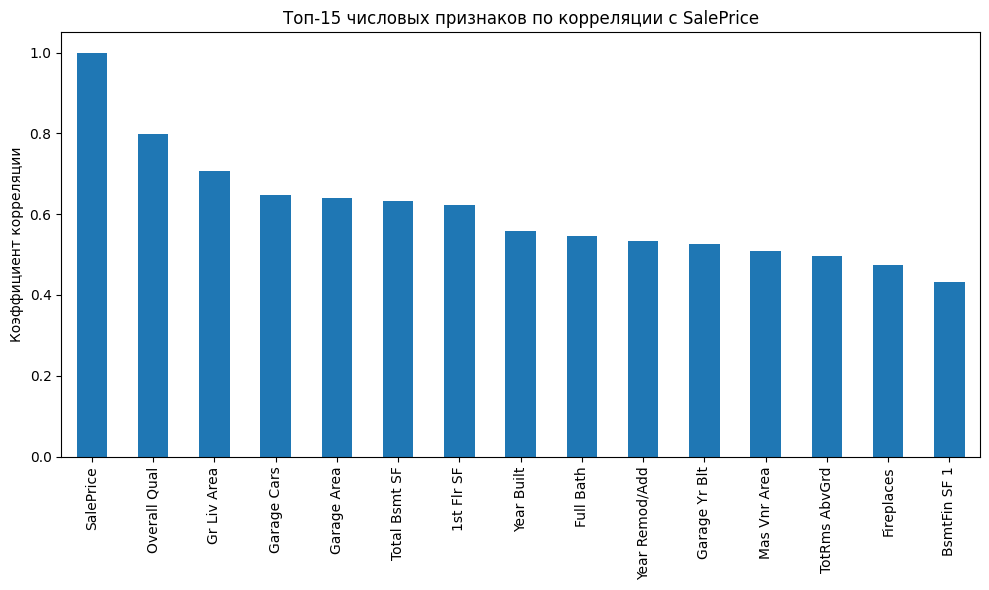

In [ ]:
 correlation = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

print("Корреляция числовых признаков с SalePrice:")
print(correlation)

plt.figure(figsize=(10, 6))
correlation.head(15).plot(kind='bar')
plt.title('Топ-15 числовых признаков по корреляции с SalePrice')
plt.ylabel('Коэффициент корреляции')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

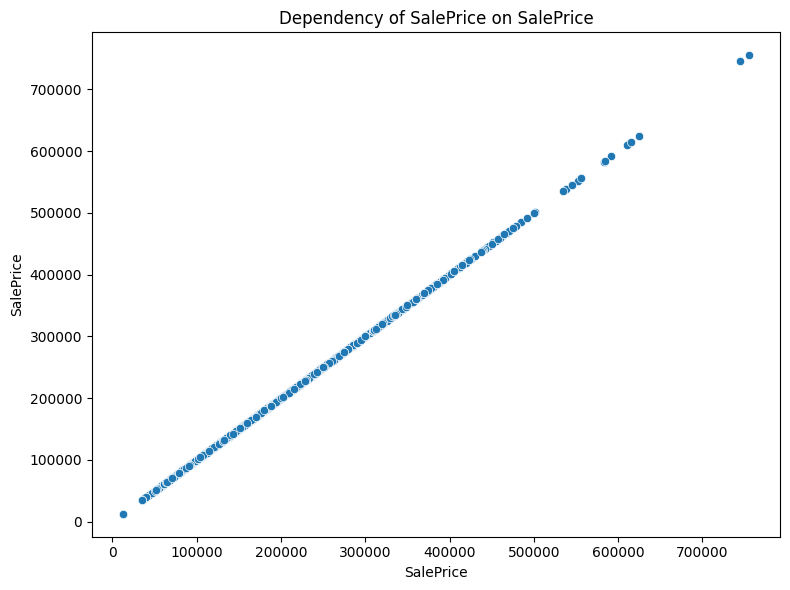

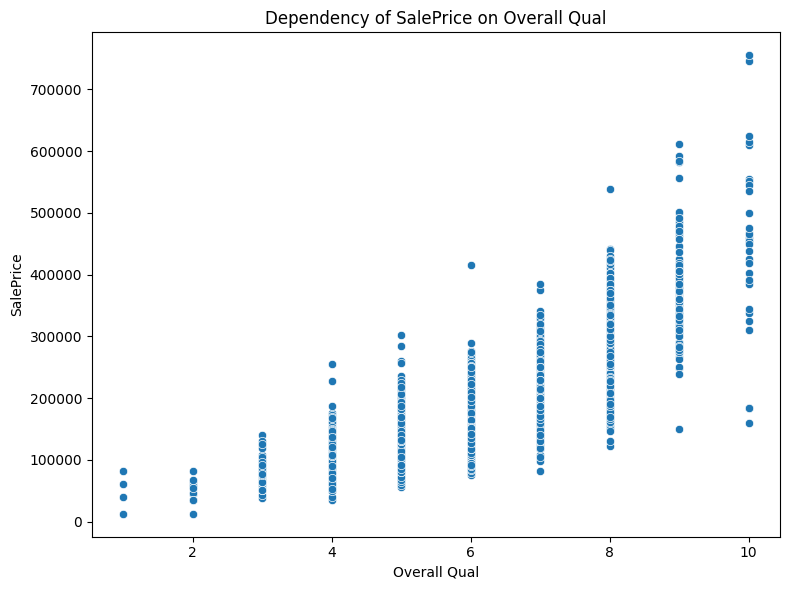

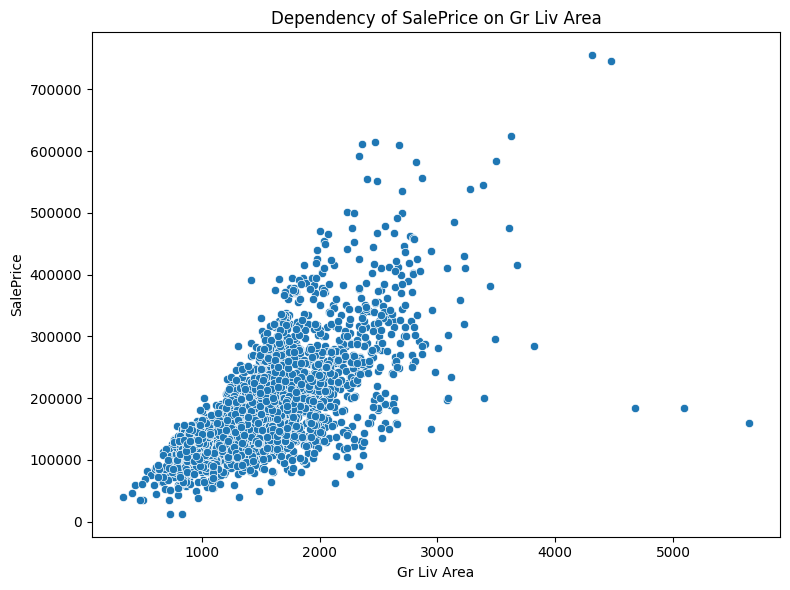

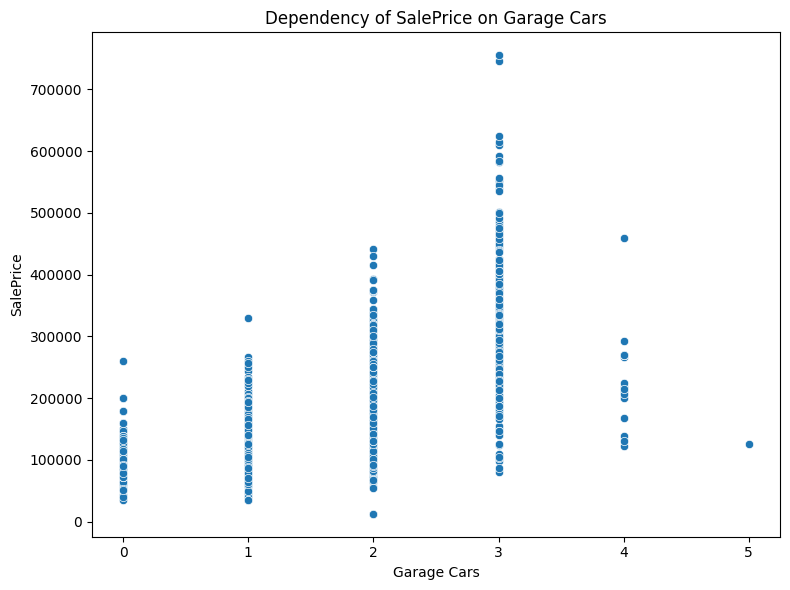

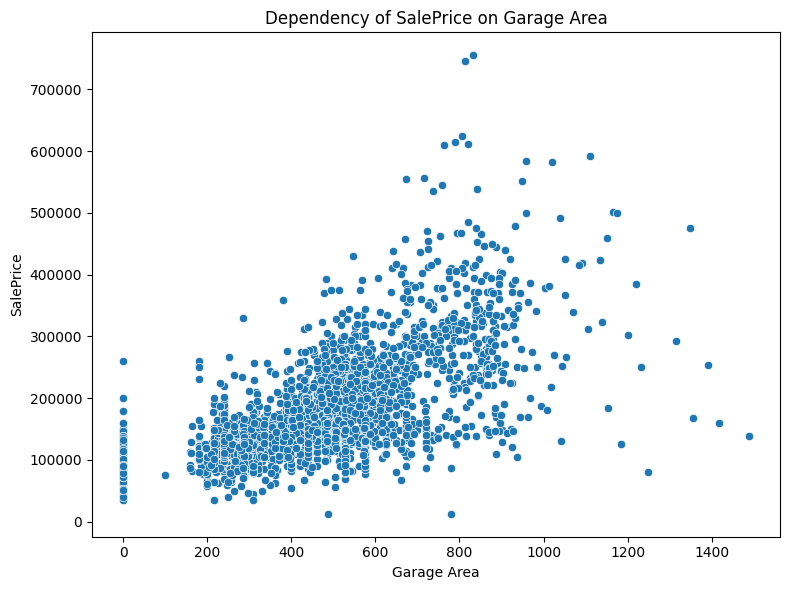

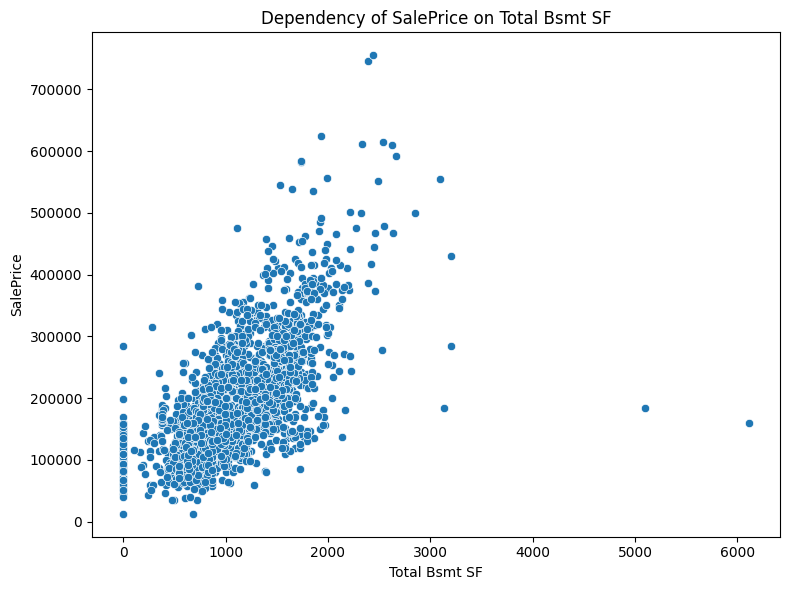

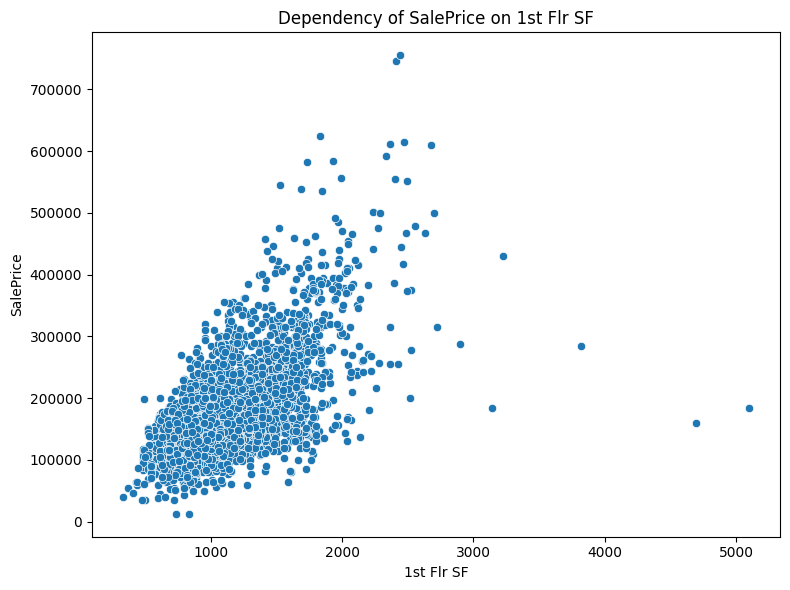

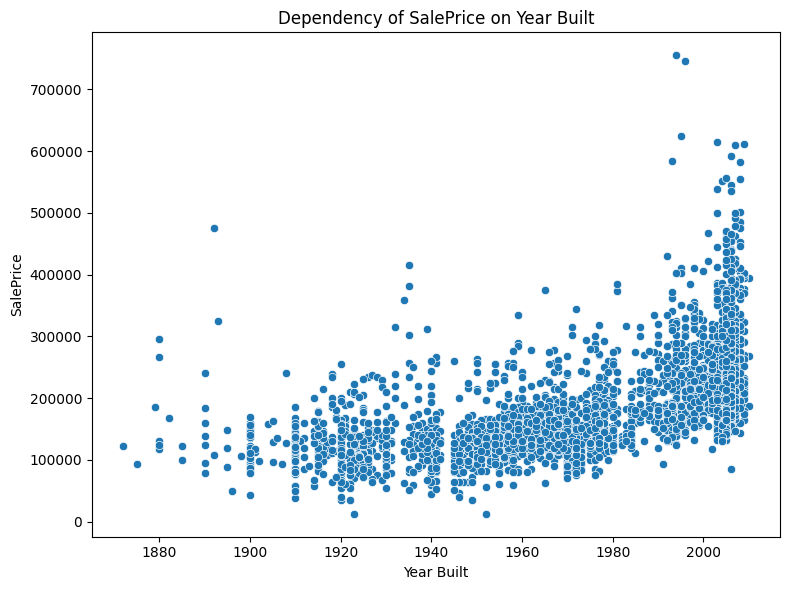

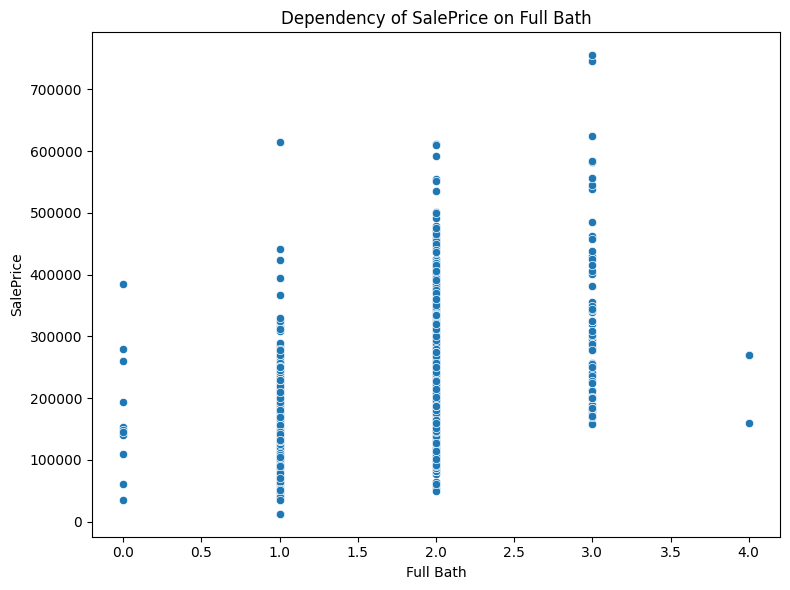

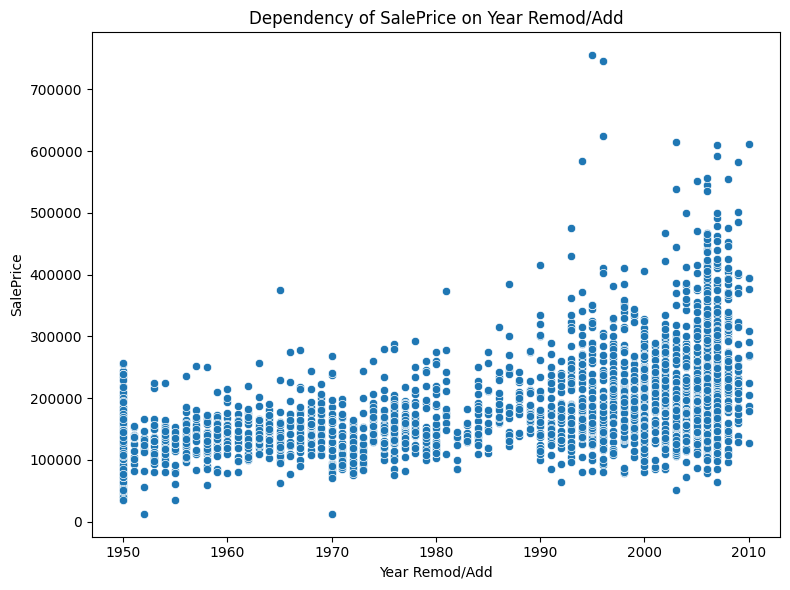

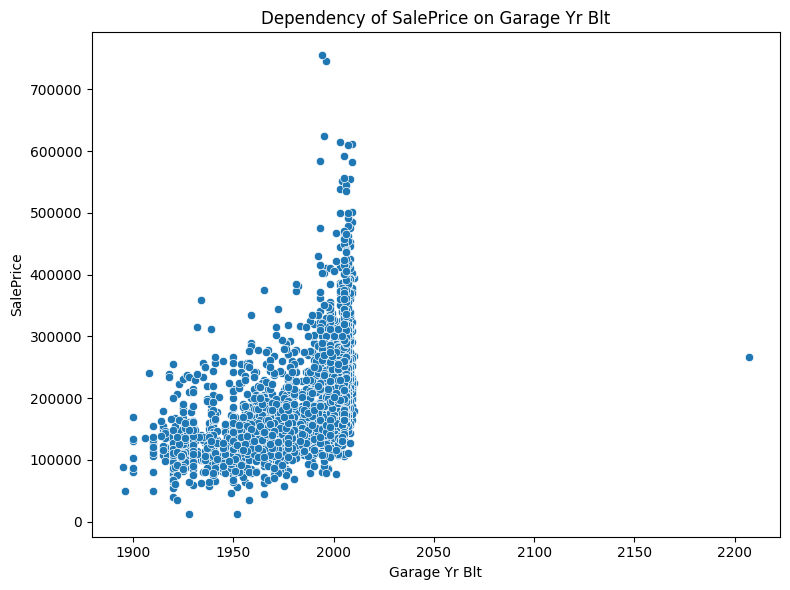

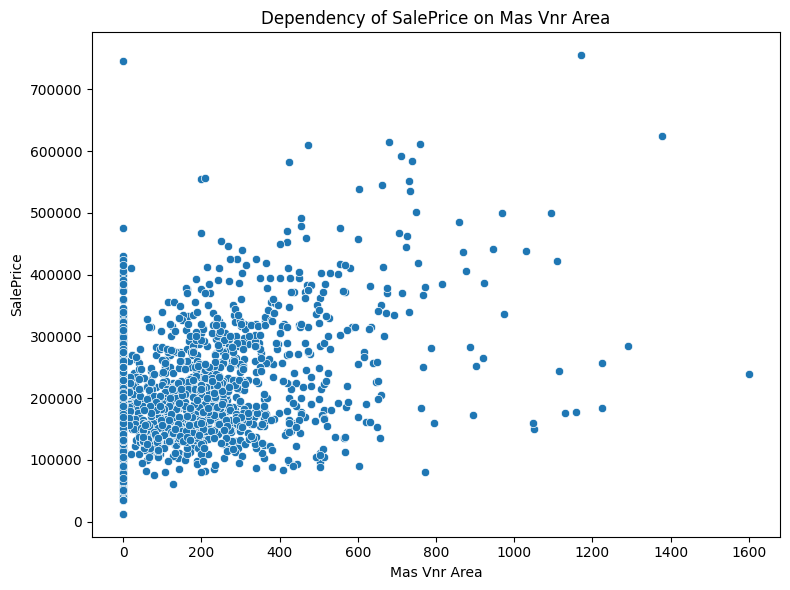

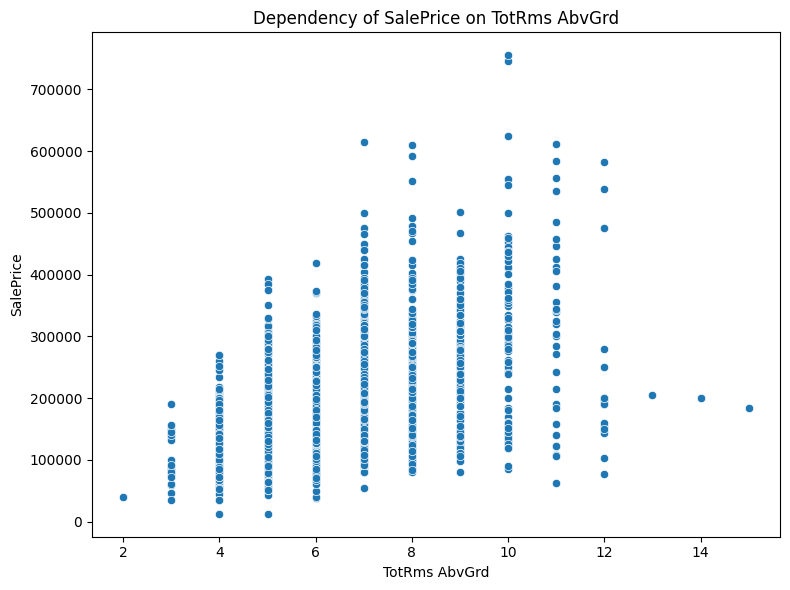

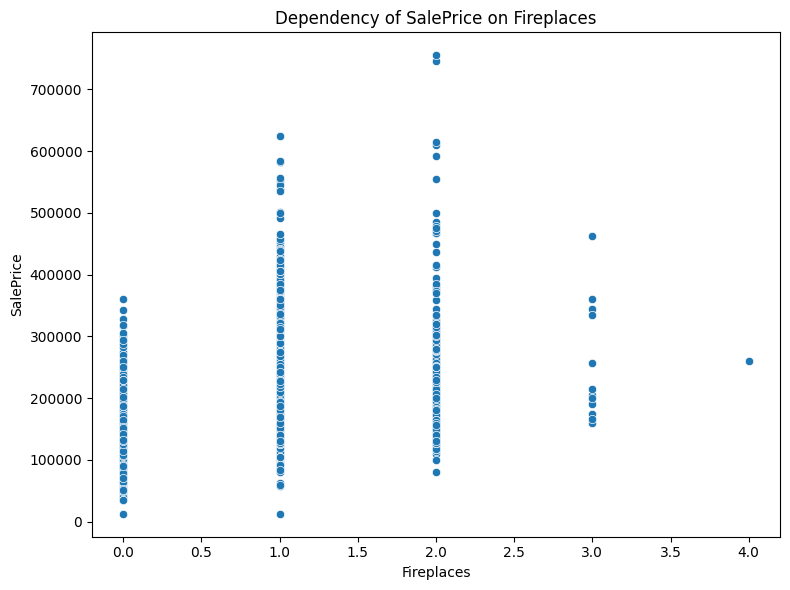

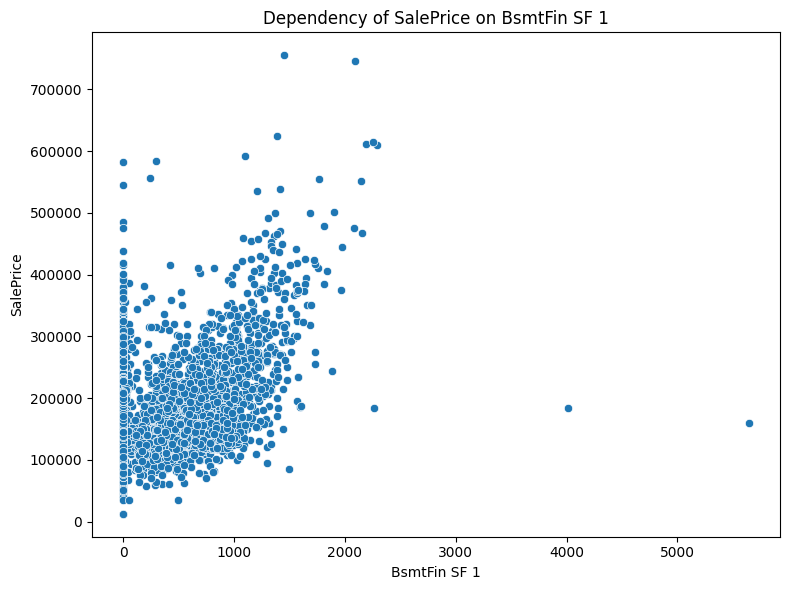

In [ ]:
for feature in correlation.head(15).index:
  plt.figure(figsize=(8,6))
  sns.scatterplot(x=df_traditional[feature], y=df_traditional['SalePrice'])
  plt.title(f'Dependency of SalePrice on {feature}')
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.tight_layout()
  plt.show()

Working with NaNs
---

In [ ]:
#identify columns with higher % of missing values
threshold = 0.8
columns_to_drop = []
for col in df_traditional.columns:
  if df_traditional[col].isnull().sum() / len(df_traditional) > threshold:
    columns_to_drop.append(col)
    print(f"Dropping {col} due to high % of missing values (> {threshold*100:.0f}%)")

In [ ]:
# drop identified columns
df_traditional = df_traditional.drop(columns = columns_to_drop)

In [ ]:
for col in df_traditional.select_dtypes(include=['number']).columns:
  if df_traditional[col].isnull().any():
    df_traditional[col] = df_traditional[col].fillna(df_traditional[col].median())

In [ ]:
nan_counts = []
for col in df_traditional.columns:
  nan_count = df_traditional[col].isna().sum()
  nan_counts.append((col, nan_count))
nan_counts

[('PID', np.int64(0)),
 ('MS SubClass', np.int64(0)),
 ('Lot Frontage', np.int64(0)),
 ('Lot Area', np.int64(0)),
 ('Overall Qual', np.int64(0)),
 ('Overall Cond', np.int64(0)),
 ('Year Built', np.int64(0)),
 ('Year Remod/Add', np.int64(0)),
 ('Mas Vnr Area', np.int64(0)),
 ('BsmtFin SF 1', np.int64(0)),
 ('BsmtFin SF 2', np.int64(0)),
 ('Bsmt Unf SF', np.int64(0)),
 ('Total Bsmt SF', np.int64(0)),
 ('1st Flr SF', np.int64(0)),
 ('2nd Flr SF', np.int64(0)),
 ('Low Qual Fin SF', np.int64(0)),
 ('Gr Liv Area', np.int64(0)),
 ('Bsmt Full Bath', np.int64(0)),
 ('Bsmt Half Bath', np.int64(0)),
 ('Full Bath', np.int64(0)),
 ('Half Bath', np.int64(0)),
 ('Bedroom AbvGr', np.int64(0)),
 ('Kitchen AbvGr', np.int64(0)),
 ('TotRms AbvGrd', np.int64(0)),
 ('Fireplaces', np.int64(0)),
 ('Garage Yr Blt', np.int64(0)),
 ('Garage Cars', np.int64(0)),
 ('Garage Area', np.int64(0)),
 ('Wood Deck SF', np.int64(0)),
 ('Open Porch SF', np.int64(0)),
 ('Enclosed Porch', np.int64(0)),
 ('3Ssn Porch', np.int6

Data Splitting
---

In [ ]:
#Features
X = df_traditional.drop('SalePrice', axis=1)

#Target
y = df_traditional['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Model Training
---

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2 = r2_score(y_test, y_pred)

print(f"Mean absolute error: {mae}")
print(f"Mean squared error: {mse_test}")
print(f"Root mean squared error: {rmse_test}")
print(f"R-squared: {r2}")

Mean absolute error: 15701.814998603111
Mean squared error: 847173207.718803
Root mean squared error: 29106.240013419854
R-squared: 0.8943351240280163


In [ ]:
y_test.min()

44000

In [ ]:
y_test.max()

625000

In [ ]:
y_test.mean()

np.float64(189651.46928327644)

In [ ]:
y_test.std()

89617.25916945942

In [ ]:
y_pred.min()

np.float64(-42387.504755903385)

In [ ]:
y_pred.max()

np.float64(611535.1109807153)

In [ ]:
y_pred.mean()

np.float64(188819.28911027653)

In [ ]:
y_pred.std()

np.float64(86271.1218815996)

REGULARIZATION
---

In [ ]:
X_reg = df_traditional.drop('SalePrice', axis=1)
y_reg = df_traditional['SalePrice']

In [ ]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [ ]:
param_grid = {
    'alpha' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]
}

In [ ]:
# Rigde regression
ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5 )
ridge_grid.fit(X_reg_train, y_reg_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.28541e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.10481e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.49156e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.39908e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [ ]:
best_ridge_alpha = ridge_grid.best_params_['alpha']
best_ridge_model = ridge_grid.best_estimator_

In [ ]:
# Approximating model to test data and outpur metrics
ridge_pred = best_ridge_model.predict(X_reg_test)
ridge_mse = mean_squared_error(y_reg_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2_score = r2_score(y_reg_test, ridge_pred)
ridge_mae = mean_absolute_error(y_reg_test, ridge_pred)

In [ ]:
# print(f"Ridgge Regression MSE: {ridge_mse}")
print(f"Ridgge Regression RMSE: {ridge_rmse}")
print(f"Ridgge Regression R2_Score: {ridge_r2_score}")
print(f"Ridgge Regression MAE: {ridge_mae}")

Ridgge Regression RMSE: 29049.507552803236
Ridgge Regression R2_Score: 0.8947466362118989
Ridgge Regression MAE: 16495.275128729794


In [ ]:
# Lasso Regression
lasso_model = Lasso()
lasso_grid = GridSearchCV(lasso_model, param_grid, scoring='neg_mean_squared_error', cv=5 )
lasso_grid.fit(X_reg_train, y_reg_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.174e+11, tolerance: 1.132e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.080e+11, tolerance: 1.082e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.049e+11, tolerance: 1.134e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [ ]:
best_lasso_alpha = lasso_grid.best_params_['alpha']
best_lasso_model = lasso_grid.best_estimator_

In [ ]:
#Approxmating model values to test data
lasso_pred = best_lasso_model.predict(X_reg_test)
lasso_mse = mean_squared_error(y_reg_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2_score = r2_score(y_reg_test, lasso_pred)
lasso_mae = mean_absolute_error(y_reg_test, lasso_pred)

In [ ]:
# print(f"Lasso regression MSE: {lasso_mse}")
print(f"Lasso Regression RMSE: {lasso_rmse}")
print(f"Lasso Regression R2_Score: {lasso_r2_score}")
print(f"Lasso Regression MAE: {lasso_mae}")

Lasso Regression RMSE: 28769.265092086196
Lasso Regression R2_Score: 0.8967676126078339
Lasso Regression MAE: 16167.400894770713


----
----

Metrics calculating
---

In [ ]:
min_error = abs(y_pred - y_test).min()
min_error

47.704681834205985

In [ ]:
max_error = abs(y_pred - y_test).max()
max_error

426785.11098071525

In [ ]:
min_reg_error = abs(ridge_pred - y_test).min()
min_reg_error

37.86925095273182

In [ ]:
max_reg_error = abs(ridge_pred - y_test).max()
max_reg_error

352356.3858573191

In [ ]:
ridge_pred.min()

np.float64(23623.568320565624)

In [ ]:
ridge_pred.max()

np.float64(537106.3858573191)

In [ ]:
ridge_pred.mean()

np.float64(188468.79971501764)

In [ ]:
ridge_pred.std()

np.float64(82104.86529829433)

In [ ]:
lasso_pred.min()

np.float64(26908.031248866348)

In [ ]:
lasso_pred.max()

np.float64(546743.1191672856)

In [ ]:
lasso_pred.mean()

np.float64(188097.9339304193)

In [ ]:
lasso_pred.std()

np.float64(82372.30409446394)

**Checking for overfitting of the LinearRegression**
---


In [ ]:
X_of_train, X_temp, y_of_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state=42)
X_val, X_of_test, y_val, y_of_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state=42)
y_train_pred = model.predict(X_of_train)
y_val_pred = model.predict(X_val)

# Calculate RMSE for training and validation sets
train_rmse = np.sqrt(mean_squared_error(y_of_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"Training RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")

Training RMSE: 18996.1210317359
Validation RMSE: 18875.75768587767


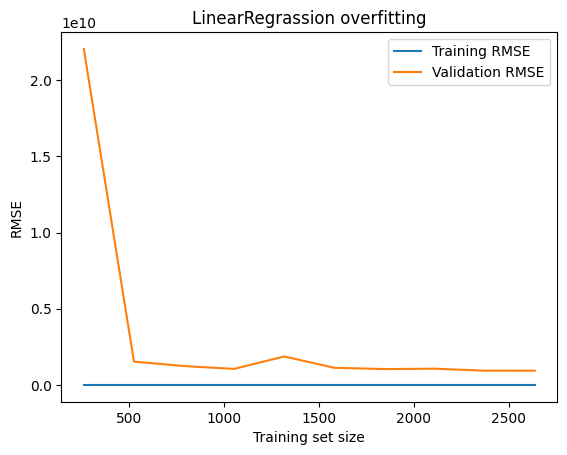

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=10, scoring='neg_mean_squared_error',
    train_sizes = np.linspace(0.1, 1.0, 10)
)

#Calculate RMSE for training and validation sets
train_rmse_scores = np.sqrt(-train_scores)
val_rmse_scores = np.sqrt(-val_scores)

#Calculate mean and standard deviation of RMSE scores
train_rmse_mean = np.mean(train_rmse_scores, axis=1)
train_rmse_std = np.std(train_rmse_scores, axis=1)
val_rmse_mean = -np.mean(val_scores, axis=1)
val_rmse_std = np.std(val_rmse_scores, axis=1)

# Plot RMSE learning curve
plt.plot(train_sizes, train_rmse_mean, label='Training RMSE')
plt.plot(train_sizes, val_rmse_mean, label='Validation RMSE')
plt.fill_between(train_sizes, train_rmse_mean - train_rmse_std, train_rmse_mean + train_rmse_std, alpha=0.1)
plt.fill_between(train_sizes, val_rmse_mean - val_rmse_std, val_rmse_mean + val_rmse_std, alpha = 0.1)
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.title('LinearRegrassion overfitting')
plt.legend()
plt.show()

**Checking for overfitting of the Ridge**
---


In [ ]:
X_ofr_train, X_temp, y_ofr_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state=42)
X_val, X_ofr_test, y_val, y_ofr_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state=42)
y_train_pred = ridge_grid.predict(X_ofr_train)
y_val_pred = ridge_grid.predict(X_val)

train_rmse = np.sqrt(mean_squared_error(y_ofr_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Training RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")

Training RMSE: 23423.84632610324
Validation RMSE: 21188.81860675799


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.1

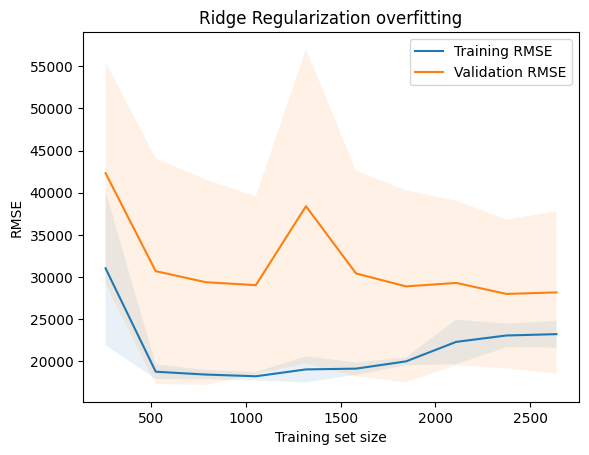

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(
    ridge_grid, X, y, cv=10, scoring='neg_mean_squared_error',
    train_sizes = np.linspace(0.1, 1.0, 10)
)

#Calculate RMSE for training and validation scores
train_rmse_scores = np.sqrt(-train_scores)
val_rmse_scores = np.sqrt(-val_scores)

# Calculate mean and standard deviation of RMSE scores
train_rmse_mean = np.mean(train_rmse_scores, axis=1)
train_rmse_std = np.std(train_rmse_scores, axis=1)
val_rmse_mean = np.mean(val_rmse_scores, axis=1)
val_rmse_std = np.std(val_rmse_scores, axis=1)

# Plot RMSE learning curve
plt.plot(train_sizes, train_rmse_mean, label='Training RMSE')
plt.plot(train_sizes, val_rmse_mean, label='Validation RMSE')
plt.fill_between(train_sizes, train_rmse_mean - train_rmse_std, train_rmse_mean + train_rmse_std, alpha=0.1)
plt.fill_between(train_sizes, val_rmse_mean - val_rmse_std, val_rmse_mean + val_rmse_std, alpha = 0.1)
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.title('Ridge Regularization overfitting')
plt.legend()
plt.show()

**Checking for overfitting Lasso**
---

In [ ]:
X_ofl_train, X_temp, y_ofl_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state=42)
X_val, X_ofl_test, y_val, y_ofl_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state=42)
y_train_pred = lasso_grid.predict(X_ofl_train)
y_val_pred = lasso_grid.predict(X_val)

# Calcualte
train_mse = mean_squared_error(y_ofl_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
print(f"Training MSE: {train_mse}")
print(f"Validation MSE: {val_mse}")

Training MSE: 523984473.4908931
Validation MSE: 427946296.23407537


In [ ]:
train_sizes, train_scores, val_scores = learning_curve(
    lasso_grid, X, y, cv=5, scoring='neg_mean_squared_error',
    train_sizes = np.linspace(0.1, 1.0, 10)
)

train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = -np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, val_mean, label='Validation error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha = 0.1)
plt.xlabel('Training set size')
plt.ylabel('MSE')
plt.title('Ridge Regularization overfitting')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.031e+08, tolerance: 4.190e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.141e+08, tolerance: 4.566e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.403e+09, tolerance: 3.995e